In [93]:

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import numpy as np
#import matplotlib.pyplot as plt
import torch

import defmod as dm
import defmod.multimodule_usefulfunctions as mm

torch.set_default_tensor_type(torch.DoubleTensor)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
gd = torch.tensor([[4.,4.], [2.5,1.], [1.,2]], requires_grad=True).view(-1)
manifold = dm.manifold.Landmarks(dim=2, nb_pts=3, gd=gd)

translations = dm.deformationmodules.Translations(manifold, sigma=0.5)

In [95]:
# Visualization of grid deformation for each submodule
xmin = -5
xmax = 5
ymin = -5
ymax = 5
dx = 0.2
dy = 0.2
nx = int((xmax-xmin)/dx)
ny = int((ymax-ymin)/dy)
x,y,gridpos = mm.gridpoints(xmin, xmax, ymin, ymax, dx, dy)

In [96]:
man_grid = dm.manifold.Landmarks(dim=2, nb_pts=len(gridpos), gd=gridpos.view(-1).requires_grad_())
silent_grid = dm.deformationmodules.SilentPoints(man_grid)
comp = dm.deformationmodules.CompoundModule([translations, silent_grid])
H = dm.hamiltonian.Hamiltonian(comp)

In [97]:
comp.manifold[0].fill_cotan(torch.tensor([[-1.,0.],[0.,1.], [1.,-1.]], requires_grad=True).view(-1))
H.geodesic_controls()

In [98]:
states, controls = dm.shooting.shoot_euler(H, it=10)

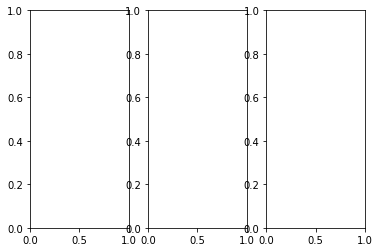

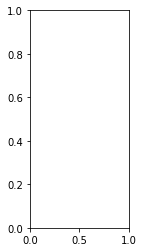

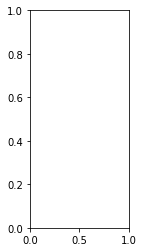

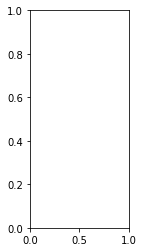

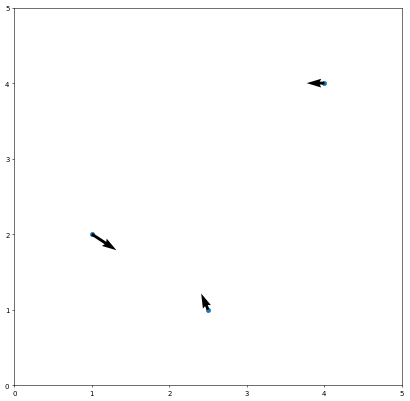

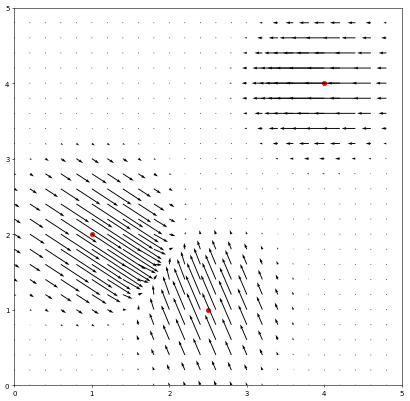

In [123]:
figsize = (10,10)
dpi=(50)
xmin = 0
xmax = 5
ymin = 0
ymax = 5

cotan = translations.manifold.cotan.detach().view(-1,2)
gd = gd.detach().view(-1,2)
controls = translations.controls.detach().view(-1,2)

import matplotlib.pyplot as plt
fig_gd_controls = plt.figure(figsize=figsize, dpi=dpi)
plt.scatter(gd[:,0], gd[:,1])
plt.quiver(gd[:,0], gd[:,1], controls[:,0], controls[:,1])
plt.xlim([0.,5.])
plt.ylim([0.,5.])
plt.show()

field = translations.field_generator()(gridpos)
fig_field = plt.figure(figsize=figsize, dpi=dpi)
plt.scatter(gd[:,0], gd[:,1], c='r')
plt.quiver(gridpos.detach()[:,0], gridpos.detach()[:,1], field.detach()[:,0], field.detach()[:,1], scale=10)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.show()


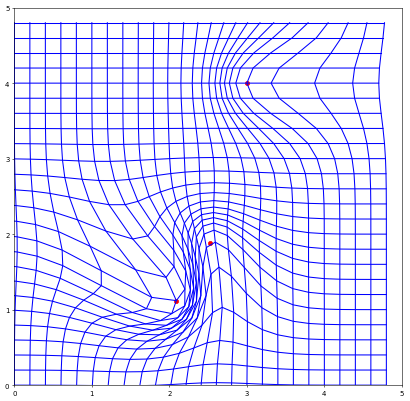

In [113]:
grid_final = states[-1].gd[1]
x1, y1 = dm.usefulfunctions.vec2grid(grid_final.view(-1,2), nx,ny)

fig_grid = mm.plot_grid(x1.detach().numpy(), y1.detach().numpy(), color = 'blue', xlim=[0.,5.], ylim=[0.,5.], figsize=figsize, dpi=dpi)
plt.scatter(states[-1][0].gd.detach().view(-1,2)[:,0],states[-1][0].gd.detach().view(-1,2)[:,1], color='red') 
plt.show()

In [128]:
fig_gd_controls.savefig('../results/Ex_Translations/ExTrans_gd_control.png')
fig_field.savefig('../results/Ex_Translations/ExTrans_field.png')
fig_grid.savefig('../results/Ex_Translations/ExTrans_grid.png')